In [1]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np

df_one = pd.read_json("../src/scripts/square-grid-geojson-correct.json")
df_one['grid1'] = 'grid1'
df_one = df_one.pivot(index="grid1",columns="key",values="value").reset_index().add_prefix('correct_grid_one_')
df_one.rename(columns={list(df_one)[0]:'grid1'}, inplace=True)

df_second = pd.read_json("../src/scripts/square-grid-geojson-second-correct.json")
df_second['grid2'] = 'grid2'
df_second = df_second.pivot(index="grid2",columns="key",values="value").reset_index().add_prefix('correct_grid_two_')
df_second.rename(columns={list(df_second)[0]:'grid2'}, inplace=True)

df_third = pd.read_json("../src/scripts/square-grid-geojson-third-correct.json")
df_third['grid3'] = 'grid3'
df_third = df_third.pivot(index="grid3",columns="key",values="value").reset_index().add_prefix('correct_grid_three_')
df_third.rename(columns={list(df_third)[0]:'grid3'}, inplace=True)

df = pd.read_csv("data/change-study-data.csv")
screenSizeDF = df['screen_size'].apply(json.loads)
screenSizeDFList = list(screenSizeDF)
screenSizeDFJSONString = json.dumps(screenSizeDFList)
df = df.join(pd.read_json(screenSizeDFJSONString), how='left', rsuffix='_right')
df = df.dropna(subset=['grid_answers'])
df = df.dropna(subset=['sus_answers'])
df = df.loc[df['sus_answers'] != 'undefined']
df['index'] = np.arange(len(df))

#grid answers
dictValuesDF = df['grid_answers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='grid_answers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['grid_answers'].str.len()),
)).join(pd.DataFrame(sdf['grid_answers'].sum()))
sdf['value'] = np.where(sdf['value'] > 0, 1, 0)
# sdf = pd.pivot_table(sdf,index=['index'],columns=['key'],values=['value'],aggfunc=np.sum).reset_index()
# sdf.columns = sdf.columns.droplevel(0)
sdf = sdf.pivot(index="index",columns="key",values="value").reset_index().add_prefix('submitted_grid_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')

#sus answers
dictValuesDF = df['sus_answers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='sus_answers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['sus_answers'].str.len()),
)).join(pd.DataFrame(sdf['sus_answers'].sum()))
# sdf = pd.pivot_table(sdf,index=['index'],columns=['key'],values=['questionAnswer'],aggfunc=np.sum).reset_index()
# sdf.columns = sdf.columns.droplevel(0)
sdf = sdf.pivot(index="index",columns="key",values="questionAnswer").reset_index().add_prefix('submitted_sus_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')
del df['index_right']

df['grid1'] = 'grid1'
df['grid2'] = 'grid2'
df['grid3'] = 'grid3'

df = pd.merge(df, df_one, left_on="grid1", right_on="grid1", how="left", validate="m:1")
df = pd.merge(df, df_second, left_on="grid2", right_on="grid2", how="left", validate="m:1")
df = pd.merge(df, df_third, left_on="grid3", right_on="grid3", how="left", validate="m:1")

df['iscorrect_grid_box_01'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-1'] == df['correct_grid_one_grid-box-1'], np.where(df['map_version']==1, df['submitted_grid_grid-box-1'] == df['correct_grid_two_grid-box-1'], np.where(df['map_version']==2, df['submitted_grid_grid-box-1'] == df['correct_grid_three_grid-box-1'], '')))
df['iscorrect_grid_box_02'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-2'] == df['correct_grid_one_grid-box-2'], np.where(df['map_version']==1, df['submitted_grid_grid-box-2'] == df['correct_grid_two_grid-box-2'], np.where(df['map_version']==2, df['submitted_grid_grid-box-2'] == df['correct_grid_three_grid-box-2'], '')))
df['iscorrect_grid_box_03'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-3'] == df['correct_grid_one_grid-box-3'], np.where(df['map_version']==1, df['submitted_grid_grid-box-3'] == df['correct_grid_two_grid-box-3'], np.where(df['map_version']==2, df['submitted_grid_grid-box-3'] == df['correct_grid_three_grid-box-3'], '')))
df['iscorrect_grid_box_04'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-4'] == df['correct_grid_one_grid-box-4'], np.where(df['map_version']==1, df['submitted_grid_grid-box-4'] == df['correct_grid_two_grid-box-4'], np.where(df['map_version']==2, df['submitted_grid_grid-box-4'] == df['correct_grid_three_grid-box-4'], '')))
df['iscorrect_grid_box_05'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-5'] == df['correct_grid_one_grid-box-5'], np.where(df['map_version']==1, df['submitted_grid_grid-box-5'] == df['correct_grid_two_grid-box-5'], np.where(df['map_version']==2, df['submitted_grid_grid-box-5'] == df['correct_grid_three_grid-box-5'], '')))
df['iscorrect_grid_box_06'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-6'] == df['correct_grid_one_grid-box-6'], np.where(df['map_version']==1, df['submitted_grid_grid-box-6'] == df['correct_grid_two_grid-box-6'], np.where(df['map_version']==2, df['submitted_grid_grid-box-6'] == df['correct_grid_three_grid-box-6'], '')))
df['iscorrect_grid_box_07'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-7'] == df['correct_grid_one_grid-box-7'], np.where(df['map_version']==1, df['submitted_grid_grid-box-7'] == df['correct_grid_two_grid-box-7'], np.where(df['map_version']==2, df['submitted_grid_grid-box-7'] == df['correct_grid_three_grid-box-7'], '')))
df['iscorrect_grid_box_08'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-8'] == df['correct_grid_one_grid-box-8'], np.where(df['map_version']==1, df['submitted_grid_grid-box-8'] == df['correct_grid_two_grid-box-8'], np.where(df['map_version']==2, df['submitted_grid_grid-box-8'] == df['correct_grid_three_grid-box-8'], '')))
df['iscorrect_grid_box_09'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-9'] == df['correct_grid_one_grid-box-9'], np.where(df['map_version']==1, df['submitted_grid_grid-box-9'] == df['correct_grid_two_grid-box-9'], np.where(df['map_version']==2, df['submitted_grid_grid-box-9'] == df['correct_grid_three_grid-box-9'], '')))

df['iscorrect_grid_box_10'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-10'] == df['correct_grid_one_grid-box-10'], np.where(df['map_version']==1, df['submitted_grid_grid-box-10'] == df['correct_grid_two_grid-box-10'], np.where(df['map_version']==2, df['submitted_grid_grid-box-10'] == df['correct_grid_three_grid-box-10'], '')))
df['iscorrect_grid_box_11'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-11'] == df['correct_grid_one_grid-box-11'], np.where(df['map_version']==1, df['submitted_grid_grid-box-11'] == df['correct_grid_two_grid-box-11'], np.where(df['map_version']==2, df['submitted_grid_grid-box-11'] == df['correct_grid_three_grid-box-11'], '')))
df['iscorrect_grid_box_12'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-12'] == df['correct_grid_one_grid-box-12'], np.where(df['map_version']==1, df['submitted_grid_grid-box-12'] == df['correct_grid_two_grid-box-12'], np.where(df['map_version']==2, df['submitted_grid_grid-box-12'] == df['correct_grid_three_grid-box-12'], '')))
df['iscorrect_grid_box_13'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-13'] == df['correct_grid_one_grid-box-13'], np.where(df['map_version']==1, df['submitted_grid_grid-box-13'] == df['correct_grid_two_grid-box-13'], np.where(df['map_version']==2, df['submitted_grid_grid-box-13'] == df['correct_grid_three_grid-box-13'], '')))
df['iscorrect_grid_box_14'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-14'] == df['correct_grid_one_grid-box-14'], np.where(df['map_version']==1, df['submitted_grid_grid-box-14'] == df['correct_grid_two_grid-box-14'], np.where(df['map_version']==2, df['submitted_grid_grid-box-14'] == df['correct_grid_three_grid-box-14'], '')))
df['iscorrect_grid_box_15'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-15'] == df['correct_grid_one_grid-box-15'], np.where(df['map_version']==1, df['submitted_grid_grid-box-15'] == df['correct_grid_two_grid-box-15'], np.where(df['map_version']==2, df['submitted_grid_grid-box-15'] == df['correct_grid_three_grid-box-15'], '')))
df['iscorrect_grid_box_16'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-16'] == df['correct_grid_one_grid-box-16'], np.where(df['map_version']==1, df['submitted_grid_grid-box-16'] == df['correct_grid_two_grid-box-16'], np.where(df['map_version']==2, df['submitted_grid_grid-box-16'] == df['correct_grid_three_grid-box-16'], '')))
df['iscorrect_grid_box_17'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-17'] == df['correct_grid_one_grid-box-17'], np.where(df['map_version']==1, df['submitted_grid_grid-box-17'] == df['correct_grid_two_grid-box-17'], np.where(df['map_version']==2, df['submitted_grid_grid-box-17'] == df['correct_grid_three_grid-box-17'], '')))
df['iscorrect_grid_box_18'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-18'] == df['correct_grid_one_grid-box-18'], np.where(df['map_version']==1, df['submitted_grid_grid-box-18'] == df['correct_grid_two_grid-box-18'], np.where(df['map_version']==2, df['submitted_grid_grid-box-18'] == df['correct_grid_three_grid-box-18'], '')))
df['iscorrect_grid_box_19'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-19'] == df['correct_grid_one_grid-box-19'], np.where(df['map_version']==1, df['submitted_grid_grid-box-19'] == df['correct_grid_two_grid-box-19'], np.where(df['map_version']==2, df['submitted_grid_grid-box-19'] == df['correct_grid_three_grid-box-19'], '')))

df['iscorrect_grid_box_20'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-20'] == df['correct_grid_one_grid-box-20'], np.where(df['map_version']==1, df['submitted_grid_grid-box-20'] == df['correct_grid_two_grid-box-20'], np.where(df['map_version']==2, df['submitted_grid_grid-box-20'] == df['correct_grid_three_grid-box-20'], '')))
df['iscorrect_grid_box_21'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-21'] == df['correct_grid_one_grid-box-21'], np.where(df['map_version']==1, df['submitted_grid_grid-box-21'] == df['correct_grid_two_grid-box-21'], np.where(df['map_version']==2, df['submitted_grid_grid-box-21'] == df['correct_grid_three_grid-box-21'], '')))
df['iscorrect_grid_box_22'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-22'] == df['correct_grid_one_grid-box-22'], np.where(df['map_version']==1, df['submitted_grid_grid-box-22'] == df['correct_grid_two_grid-box-22'], np.where(df['map_version']==2, df['submitted_grid_grid-box-22'] == df['correct_grid_three_grid-box-22'], '')))
df['iscorrect_grid_box_23'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-23'] == df['correct_grid_one_grid-box-23'], np.where(df['map_version']==1, df['submitted_grid_grid-box-23'] == df['correct_grid_two_grid-box-23'], np.where(df['map_version']==2, df['submitted_grid_grid-box-23'] == df['correct_grid_three_grid-box-23'], '')))
df['iscorrect_grid_box_24'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-24'] == df['correct_grid_one_grid-box-24'], np.where(df['map_version']==1, df['submitted_grid_grid-box-24'] == df['correct_grid_two_grid-box-24'], np.where(df['map_version']==2, df['submitted_grid_grid-box-24'] == df['correct_grid_three_grid-box-24'], '')))
df['iscorrect_grid_box_25'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-25'] == df['correct_grid_one_grid-box-25'], np.where(df['map_version']==1, df['submitted_grid_grid-box-25'] == df['correct_grid_two_grid-box-25'], np.where(df['map_version']==2, df['submitted_grid_grid-box-25'] == df['correct_grid_three_grid-box-25'], '')))
df['iscorrect_grid_box_26'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-26'] == df['correct_grid_one_grid-box-26'], np.where(df['map_version']==1, df['submitted_grid_grid-box-26'] == df['correct_grid_two_grid-box-26'], np.where(df['map_version']==2, df['submitted_grid_grid-box-26'] == df['correct_grid_three_grid-box-26'], '')))
df['iscorrect_grid_box_27'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-27'] == df['correct_grid_one_grid-box-27'], np.where(df['map_version']==1, df['submitted_grid_grid-box-27'] == df['correct_grid_two_grid-box-27'], np.where(df['map_version']==2, df['submitted_grid_grid-box-27'] == df['correct_grid_three_grid-box-27'], '')))
df['iscorrect_grid_box_28'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-28'] == df['correct_grid_one_grid-box-28'], np.where(df['map_version']==1, df['submitted_grid_grid-box-28'] == df['correct_grid_two_grid-box-28'], np.where(df['map_version']==2, df['submitted_grid_grid-box-28'] == df['correct_grid_three_grid-box-28'], '')))
df['iscorrect_grid_box_29'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-29'] == df['correct_grid_one_grid-box-29'], np.where(df['map_version']==1, df['submitted_grid_grid-box-29'] == df['correct_grid_two_grid-box-29'], np.where(df['map_version']==2, df['submitted_grid_grid-box-29'] == df['correct_grid_three_grid-box-29'], '')))

df['iscorrect_grid_box_30'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-30'] == df['correct_grid_one_grid-box-30'], np.where(df['map_version']==1, df['submitted_grid_grid-box-30'] == df['correct_grid_two_grid-box-30'], np.where(df['map_version']==2, df['submitted_grid_grid-box-30'] == df['correct_grid_three_grid-box-30'], '')))
df['iscorrect_grid_box_31'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-31'] == df['correct_grid_one_grid-box-31'], np.where(df['map_version']==1, df['submitted_grid_grid-box-31'] == df['correct_grid_two_grid-box-31'], np.where(df['map_version']==2, df['submitted_grid_grid-box-31'] == df['correct_grid_three_grid-box-31'], '')))
df['iscorrect_grid_box_32'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-32'] == df['correct_grid_one_grid-box-32'], np.where(df['map_version']==1, df['submitted_grid_grid-box-32'] == df['correct_grid_two_grid-box-32'], np.where(df['map_version']==2, df['submitted_grid_grid-box-32'] == df['correct_grid_three_grid-box-32'], '')))
df['iscorrect_grid_box_33'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-33'] == df['correct_grid_one_grid-box-33'], np.where(df['map_version']==1, df['submitted_grid_grid-box-33'] == df['correct_grid_two_grid-box-33'], np.where(df['map_version']==2, df['submitted_grid_grid-box-33'] == df['correct_grid_three_grid-box-33'], '')))
df['iscorrect_grid_box_34'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-34'] == df['correct_grid_one_grid-box-34'], np.where(df['map_version']==1, df['submitted_grid_grid-box-34'] == df['correct_grid_two_grid-box-34'], np.where(df['map_version']==2, df['submitted_grid_grid-box-34'] == df['correct_grid_three_grid-box-34'], '')))
df['iscorrect_grid_box_35'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-35'] == df['correct_grid_one_grid-box-35'], np.where(df['map_version']==1, df['submitted_grid_grid-box-35'] == df['correct_grid_two_grid-box-35'], np.where(df['map_version']==2, df['submitted_grid_grid-box-35'] == df['correct_grid_three_grid-box-35'], '')))
df['iscorrect_grid_box_36'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-36'] == df['correct_grid_one_grid-box-36'], np.where(df['map_version']==1, df['submitted_grid_grid-box-36'] == df['correct_grid_two_grid-box-36'], np.where(df['map_version']==2, df['submitted_grid_grid-box-36'] == df['correct_grid_three_grid-box-36'], '')))
df['iscorrect_grid_box_37'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-37'] == df['correct_grid_one_grid-box-37'], np.where(df['map_version']==1, df['submitted_grid_grid-box-37'] == df['correct_grid_two_grid-box-37'], np.where(df['map_version']==2, df['submitted_grid_grid-box-37'] == df['correct_grid_three_grid-box-37'], '')))
df['iscorrect_grid_box_38'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-38'] == df['correct_grid_one_grid-box-38'], np.where(df['map_version']==1, df['submitted_grid_grid-box-38'] == df['correct_grid_two_grid-box-38'], np.where(df['map_version']==2, df['submitted_grid_grid-box-38'] == df['correct_grid_three_grid-box-38'], '')))
df['iscorrect_grid_box_39'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-39'] == df['correct_grid_one_grid-box-39'], np.where(df['map_version']==1, df['submitted_grid_grid-box-39'] == df['correct_grid_two_grid-box-39'], np.where(df['map_version']==2, df['submitted_grid_grid-box-39'] == df['correct_grid_three_grid-box-39'], '')))

df['iscorrect_grid_box_40'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-40'] == df['correct_grid_one_grid-box-40'], np.where(df['map_version']==1, df['submitted_grid_grid-box-40'] == df['correct_grid_two_grid-box-40'], np.where(df['map_version']==2, df['submitted_grid_grid-box-40'] == df['correct_grid_three_grid-box-40'], '')))
df['iscorrect_grid_box_41'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-41'] == df['correct_grid_one_grid-box-41'], np.where(df['map_version']==1, df['submitted_grid_grid-box-41'] == df['correct_grid_two_grid-box-41'], np.where(df['map_version']==2, df['submitted_grid_grid-box-41'] == df['correct_grid_three_grid-box-41'], '')))
df['iscorrect_grid_box_42'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-42'] == df['correct_grid_one_grid-box-42'], np.where(df['map_version']==1, df['submitted_grid_grid-box-42'] == df['correct_grid_two_grid-box-42'], np.where(df['map_version']==2, df['submitted_grid_grid-box-42'] == df['correct_grid_three_grid-box-42'], '')))

# 
# df['grid_box_correct_01'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-1'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-1'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-1'], '')))
# df['grid_box_correct_02'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-2'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-2'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-2'], '')))
# df['grid_box_correct_03'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-3'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-3'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-3'], '')))
# df['grid_box_correct_04'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-4'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-4'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-4'], '')))
# df['grid_box_correct_05'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-5'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-5'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-5'], '')))
# df['grid_box_correct_06'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-6'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-6'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-6'], '')))
# df['grid_box_correct_07'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-7'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-7'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-7'], '')))
# df['grid_box_correct_08'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-8'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-8'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-8'], '')))
# df['grid_box_correct_09'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-9'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-9'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-9'], '')))
# df['grid_box_correct_10'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-10'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-10'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-10'], '')))
# df['grid_box_correct_11'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-11'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-11'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-11'], '')))
# df['grid_box_correct_12'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-12'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-12'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-12'], '')))
# df['grid_box_correct_13'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-13'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-13'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-13'], '')))
# df['grid_box_correct_14'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-14'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-14'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-14'], '')))
# df['grid_box_correct_15'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-15'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-15'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-15'], '')))
# df['grid_box_correct_16'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-16'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-16'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-16'], '')))
# df['grid_box_correct_17'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-17'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-17'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-17'], '')))
# df['grid_box_correct_18'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-18'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-18'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-18'], '')))
# df['grid_box_correct_19'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-19'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-19'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-19'], '')))
# df['grid_box_correct_20'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-20'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-20'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-20'], '')))
# df['grid_box_correct_21'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-21'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-21'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-21'], '')))
# df['grid_box_correct_22'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-22'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-22'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-22'], '')))
# df['grid_box_correct_23'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-23'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-23'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-23'], '')))
# df['grid_box_correct_24'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-24'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-24'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-24'], '')))
# df['grid_box_correct_25'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-25'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-25'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-25'], '')))
# df['grid_box_correct_26'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-26'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-26'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-26'], '')))
# df['grid_box_correct_27'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-27'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-27'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-27'], '')))
# df['grid_box_correct_28'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-28'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-28'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-28'], '')))
# df['grid_box_correct_29'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-29'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-29'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-29'], '')))
# df['grid_box_correct_30'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-30'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-30'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-30'], '')))
# df['grid_box_correct_31'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-31'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-31'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-31'], '')))
# df['grid_box_correct_32'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-32'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-32'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-32'], '')))
# df['grid_box_correct_33'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-33'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-33'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-33'], '')))
# df['grid_box_correct_34'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-34'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-34'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-34'], '')))
# df['grid_box_correct_35'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-35'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-35'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-35'], '')))
# df['grid_box_correct_36'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-36'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-36'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-36'], '')))
# df['grid_box_correct_37'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-37'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-37'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-37'], '')))
# df['grid_box_correct_38'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-38'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-38'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-38'], '')))
# df['grid_box_correct_39'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-39'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-39'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-39'], '')))
# df['grid_box_correct_40'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-40'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-40'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-40'], '')))
# df['grid_box_correct_41'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-41'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-41'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-41'], '')))
# df['grid_box_correct_42'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-42'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-42'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-42'], '')))

del  df['correct_grid_one_grid-box-1']
del  df['correct_grid_two_grid-box-1']
del  df['correct_grid_three_grid-box-1']

del  df['correct_grid_one_grid-box-2']
del  df['correct_grid_two_grid-box-2']
del  df['correct_grid_three_grid-box-2']

del  df['correct_grid_one_grid-box-3']
del  df['correct_grid_two_grid-box-3']
del  df['correct_grid_three_grid-box-3']

del  df['correct_grid_one_grid-box-4']
del  df['correct_grid_two_grid-box-4']
del  df['correct_grid_three_grid-box-4']

del  df['correct_grid_one_grid-box-5']
del  df['correct_grid_two_grid-box-5']
del  df['correct_grid_three_grid-box-5']

del  df['correct_grid_one_grid-box-6']
del  df['correct_grid_two_grid-box-6']
del  df['correct_grid_three_grid-box-6']

del  df['correct_grid_one_grid-box-7']
del  df['correct_grid_two_grid-box-7']
del  df['correct_grid_three_grid-box-7']

del  df['correct_grid_one_grid-box-8']
del  df['correct_grid_two_grid-box-8']
del  df['correct_grid_three_grid-box-8']

del  df['correct_grid_one_grid-box-9']
del  df['correct_grid_two_grid-box-9']
del  df['correct_grid_three_grid-box-9']

del  df['correct_grid_one_grid-box-10']
del  df['correct_grid_two_grid-box-10']
del  df['correct_grid_three_grid-box-10']

del  df['correct_grid_one_grid-box-11']
del  df['correct_grid_two_grid-box-11']
del  df['correct_grid_three_grid-box-11']

del  df['correct_grid_one_grid-box-12']
del  df['correct_grid_two_grid-box-12']
del  df['correct_grid_three_grid-box-12']

del  df['correct_grid_one_grid-box-13']
del  df['correct_grid_two_grid-box-13']
del  df['correct_grid_three_grid-box-13']

del  df['correct_grid_one_grid-box-14']
del  df['correct_grid_two_grid-box-14']
del  df['correct_grid_three_grid-box-14']

del  df['correct_grid_one_grid-box-15']
del  df['correct_grid_two_grid-box-15']
del  df['correct_grid_three_grid-box-15']

del  df['correct_grid_one_grid-box-16']
del  df['correct_grid_two_grid-box-16']
del  df['correct_grid_three_grid-box-16']

del  df['correct_grid_one_grid-box-17']
del  df['correct_grid_two_grid-box-17']
del  df['correct_grid_three_grid-box-17']

del  df['correct_grid_one_grid-box-18']
del  df['correct_grid_two_grid-box-18']
del  df['correct_grid_three_grid-box-18']

del  df['correct_grid_one_grid-box-19']
del  df['correct_grid_two_grid-box-19']
del  df['correct_grid_three_grid-box-19']

del  df['correct_grid_one_grid-box-20']
del  df['correct_grid_two_grid-box-20']
del  df['correct_grid_three_grid-box-20']

del  df['correct_grid_one_grid-box-21']
del  df['correct_grid_two_grid-box-21']
del  df['correct_grid_three_grid-box-21']

del  df['correct_grid_one_grid-box-22']
del  df['correct_grid_two_grid-box-22']
del  df['correct_grid_three_grid-box-22']

del  df['correct_grid_one_grid-box-23']
del  df['correct_grid_two_grid-box-23']
del  df['correct_grid_three_grid-box-23']

del  df['correct_grid_one_grid-box-24']
del  df['correct_grid_two_grid-box-24']
del  df['correct_grid_three_grid-box-24']

del  df['correct_grid_one_grid-box-25']
del  df['correct_grid_two_grid-box-25']
del  df['correct_grid_three_grid-box-25']

del  df['correct_grid_one_grid-box-26']
del  df['correct_grid_two_grid-box-26']
del  df['correct_grid_three_grid-box-26']

del  df['correct_grid_one_grid-box-27']
del  df['correct_grid_two_grid-box-27']
del  df['correct_grid_three_grid-box-27']

del  df['correct_grid_one_grid-box-28']
del  df['correct_grid_two_grid-box-28']
del  df['correct_grid_three_grid-box-28']

del  df['correct_grid_one_grid-box-29']
del  df['correct_grid_two_grid-box-29']
del  df['correct_grid_three_grid-box-29']

del  df['correct_grid_one_grid-box-30']
del  df['correct_grid_two_grid-box-30']
del  df['correct_grid_three_grid-box-30']

del  df['correct_grid_one_grid-box-31']
del  df['correct_grid_two_grid-box-31']
del  df['correct_grid_three_grid-box-31']

del  df['correct_grid_one_grid-box-32']
del  df['correct_grid_two_grid-box-32']
del  df['correct_grid_three_grid-box-32']

del  df['correct_grid_one_grid-box-33']
del  df['correct_grid_two_grid-box-33']
del  df['correct_grid_three_grid-box-33']

del  df['correct_grid_one_grid-box-34']
del  df['correct_grid_two_grid-box-34']
del  df['correct_grid_three_grid-box-34']

del  df['correct_grid_one_grid-box-35']
del  df['correct_grid_two_grid-box-35']
del  df['correct_grid_three_grid-box-35']

del  df['correct_grid_one_grid-box-36']
del  df['correct_grid_two_grid-box-36']
del  df['correct_grid_three_grid-box-36']

del  df['correct_grid_one_grid-box-37']
del  df['correct_grid_two_grid-box-37']
del  df['correct_grid_three_grid-box-37']

del  df['correct_grid_one_grid-box-38']
del  df['correct_grid_two_grid-box-38']
del  df['correct_grid_three_grid-box-38']

del  df['correct_grid_one_grid-box-39']
del  df['correct_grid_two_grid-box-39']
del  df['correct_grid_three_grid-box-39']

del  df['correct_grid_one_grid-box-40']
del  df['correct_grid_two_grid-box-40']
del  df['correct_grid_three_grid-box-40']

del  df['correct_grid_one_grid-box-41']
del  df['correct_grid_two_grid-box-41']
del  df['correct_grid_three_grid-box-41']

del  df['correct_grid_one_grid-box-42']
del  df['correct_grid_two_grid-box-42']
del  df['correct_grid_three_grid-box-42']
                                     
# df['grid_box_submitted_01'] = df['submitted_grid_grid-box-1']
# df['grid_box_submitted_02'] = df['submitted_grid_grid-box-2']
# df['grid_box_submitted_03'] = df['submitted_grid_grid-box-3']
# df['grid_box_submitted_04'] = df['submitted_grid_grid-box-4']
# df['grid_box_submitted_05'] = df['submitted_grid_grid-box-5']
# df['grid_box_submitted_06'] = df['submitted_grid_grid-box-6']
# df['grid_box_submitted_07'] = df['submitted_grid_grid-box-7']
# df['grid_box_submitted_08'] = df['submitted_grid_grid-box-8']
# df['grid_box_submitted_09'] = df['submitted_grid_grid-box-9']

# df['grid_box_submitted_10'] = df['submitted_grid_grid-box-10']
# df['grid_box_submitted_11'] = df['submitted_grid_grid-box-11']
# df['grid_box_submitted_12'] = df['submitted_grid_grid-box-12']
# df['grid_box_submitted_13'] = df['submitted_grid_grid-box-13']
# df['grid_box_submitted_14'] = df['submitted_grid_grid-box-14']
# df['grid_box_submitted_15'] = df['submitted_grid_grid-box-15']
# df['grid_box_submitted_16'] = df['submitted_grid_grid-box-16']
# df['grid_box_submitted_17'] = df['submitted_grid_grid-box-17']
# df['grid_box_submitted_18'] = df['submitted_grid_grid-box-18']
# df['grid_box_submitted_19'] = df['submitted_grid_grid-box-19']

# df['grid_box_submitted_20'] = df['submitted_grid_grid-box-20']
# df['grid_box_submitted_21'] = df['submitted_grid_grid-box-21']
# df['grid_box_submitted_22'] = df['submitted_grid_grid-box-22']
# df['grid_box_submitted_23'] = df['submitted_grid_grid-box-23']
# df['grid_box_submitted_24'] = df['submitted_grid_grid-box-24']
# df['grid_box_submitted_25'] = df['submitted_grid_grid-box-25']
# df['grid_box_submitted_26'] = df['submitted_grid_grid-box-26']
# df['grid_box_submitted_27'] = df['submitted_grid_grid-box-27']
# df['grid_box_submitted_28'] = df['submitted_grid_grid-box-28']
# df['grid_box_submitted_29'] = df['submitted_grid_grid-box-29']
 
# df['grid_box_submitted_30'] = df['submitted_grid_grid-box-30']
# df['grid_box_submitted_31'] = df['submitted_grid_grid-box-31']
# df['grid_box_submitted_32'] = df['submitted_grid_grid-box-32']
# df['grid_box_submitted_33'] = df['submitted_grid_grid-box-33']
# df['grid_box_submitted_34'] = df['submitted_grid_grid-box-34']
# df['grid_box_submitted_35'] = df['submitted_grid_grid-box-35']
# df['grid_box_submitted_36'] = df['submitted_grid_grid-box-36']
# df['grid_box_submitted_37'] = df['submitted_grid_grid-box-37']
# df['grid_box_submitted_38'] = df['submitted_grid_grid-box-38']
# df['grid_box_submitted_39'] = df['submitted_grid_grid-box-39']
    
# df['grid_box_submitted_40'] = df['submitted_grid_grid-box-40']
# df['grid_box_submitted_41'] = df['submitted_grid_grid-box-41']
# df['grid_box_submitted_42'] = df['submitted_grid_grid-box-42']                                  

del  df['submitted_grid_grid-box-0']
del  df['submitted_grid_grid-box-1']
del  df['submitted_grid_grid-box-2']
del  df['submitted_grid_grid-box-3']
del  df['submitted_grid_grid-box-4']
del  df['submitted_grid_grid-box-5']
del  df['submitted_grid_grid-box-6']
del  df['submitted_grid_grid-box-7']
del  df['submitted_grid_grid-box-8']
del  df['submitted_grid_grid-box-9']

del  df['submitted_grid_grid-box-10']
del  df['submitted_grid_grid-box-11']
del  df['submitted_grid_grid-box-12']
del  df['submitted_grid_grid-box-13']
del  df['submitted_grid_grid-box-14']
del  df['submitted_grid_grid-box-15']
del  df['submitted_grid_grid-box-16']
del  df['submitted_grid_grid-box-17']
del  df['submitted_grid_grid-box-18']
del  df['submitted_grid_grid-box-19']

del  df['submitted_grid_grid-box-20']
del  df['submitted_grid_grid-box-21']
del  df['submitted_grid_grid-box-22']
del  df['submitted_grid_grid-box-23']
del  df['submitted_grid_grid-box-24']
del  df['submitted_grid_grid-box-25']
del  df['submitted_grid_grid-box-26']
del  df['submitted_grid_grid-box-27']
del  df['submitted_grid_grid-box-28']
del  df['submitted_grid_grid-box-29']
                                     
del  df['submitted_grid_grid-box-30']
del  df['submitted_grid_grid-box-31']
del  df['submitted_grid_grid-box-32']
del  df['submitted_grid_grid-box-33']
del  df['submitted_grid_grid-box-34']
del  df['submitted_grid_grid-box-35']
del  df['submitted_grid_grid-box-36']
del  df['submitted_grid_grid-box-37']
del  df['submitted_grid_grid-box-38']
del  df['submitted_grid_grid-box-39']

                                                                          
del  df['submitted_grid_grid-box-40']
del  df['submitted_grid_grid-box-41']
del  df['submitted_grid_grid-box-42']

df['sus-score'] = ((df['submitted_sus_sus-question-1'] - 1).astype(float)+  
                    (5 - df['submitted_sus_sus-question-2']).astype(float) +
                    (df['submitted_sus_sus-question-3'] - 1).astype(float) + 
                    (5 - df['submitted_sus_sus-question-4']).astype(float) +
                    (df['submitted_sus_sus-question-5'] - 1).astype(float) + 
                    (5 - df['submitted_sus_sus-question-6']).astype(float) +
                    (df['submitted_sus_sus-question-7'] - 1).astype(float) + 
                    (5 - df['submitted_sus_sus-question-8']).astype(float) +
                    (df['submitted_sus_sus-question-9'] - 1).astype(float) +
                    (5 - df['submitted_sus_sus-question-10'])).astype(float) * 2.5

del  df['submitted_sus_sus-question-1']
del  df['submitted_sus_sus-question-2']
del  df['submitted_sus_sus-question-3']
del  df['submitted_sus_sus-question-4']
del  df['submitted_sus_sus-question-5']
del  df['submitted_sus_sus-question-6']
del  df['submitted_sus_sus-question-7']
del  df['submitted_sus_sus-question-8']
del  df['submitted_sus_sus-question-9']
del  df['submitted_sus_sus-question-10']

# df['iscorrect_grid_box_02'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-2'] == df['correct_grid_one_grid-box-2'], np.where(df['map_version']==1, df['submitted_grid_grid-box-2'] == df['correct_grid_two_grid-box-2'], np.where(df['map_version']==2, df['submitted_grid_grid-box-2'] == df['correct_grid_three_grid-box-2'], '')))
# df['iscorrect_grid_box_03'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-3'] == df['correct_grid_one_grid-box-3'], np.where(df['map_version']==1, df['submitted_grid_grid-box-3'] == df['correct_grid_two_grid-box-3'], np.where(df['map_version']==2, df['submitted_grid_grid-box-3'] == df['correct_grid_three_grid-box-3'], '')))
# df['iscorrect_grid_box_04'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-4'] == df['correct_grid_one_grid-box-4'], np.where(df['map_version']==1, df['submitted_grid_grid-box-4'] == df['correct_grid_two_grid-box-4'], np.where(df['map_version']==2, df['submitted_grid_grid-box-4'] == df['correct_grid_three_grid-box-4'], '')))
# df['iscorrect_grid_box_05'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-5'] == df['correct_grid_one_grid-box-5'], np.where(df['map_version']==1, df['submitted_grid_grid-box-5'] == df['correct_grid_two_grid-box-5'], np.where(df['map_version']==2, df['submitted_grid_grid-box-5'] == df['correct_grid_three_grid-box-5'], '')))
# df['iscorrect_grid_box_06'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-6'] == df['correct_grid_one_grid-box-6'], np.where(df['map_version']==1, df['submitted_grid_grid-box-6'] == df['correct_grid_two_grid-box-6'], np.where(df['map_version']==2, df['submitted_grid_grid-box-6'] == df['correct_grid_three_grid-box-6'], '')))
# df['iscorrect_grid_box_07'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-7'] == df['correct_grid_one_grid-box-7'], np.where(df['map_version']==1, df['submitted_grid_grid-box-7'] == df['correct_grid_two_grid-box-7'], np.where(df['map_version']==2, df['submitted_grid_grid-box-7'] == df['correct_grid_three_grid-box-7'], '')))
# df['iscorrect_grid_box_08'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-8'] == df['correct_grid_one_grid-box-8'], np.where(df['map_version']==1, df['submitted_grid_grid-box-8'] == df['correct_grid_two_grid-box-8'], np.where(df['map_version']==2, df['submitted_grid_grid-box-8'] == df['correct_grid_three_grid-box-8'], '')))
# df['iscorrect_grid_box_09'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-9'] == df['correct_grid_one_grid-box-9'], np.where(df['map_version']==1, df['submitted_grid_grid-box-9'] == df['correct_grid_two_grid-box-9'], np.where(df['map_version']==2, df['submitted_grid_grid-box-9'] == df['correct_grid_three_grid-box-9'], '')))

# df['iscorrect_grid_box_10'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-10'] == df['correct_grid_one_grid-box-10'], np.where(df['map_version']==1, df['submitted_grid_grid-box-10'] == df['correct_grid_two_grid-box-10'], np.where(df['map_version']==2, df['submitted_grid_grid-box-10'] == df['correct_grid_three_grid-box-10'], '')))
# df['iscorrect_grid_box_11'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-11'] == df['correct_grid_one_grid-box-11'], np.where(df['map_version']==1, df['submitted_grid_grid-box-11'] == df['correct_grid_two_grid-box-11'], np.where(df['map_version']==2, df['submitted_grid_grid-box-11'] == df['correct_grid_three_grid-box-11'], '')))
# df['iscorrect_grid_box_12'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-12'] == df['correct_grid_one_grid-box-12'], np.where(df['map_version']==1, df['submitted_grid_grid-box-12'] == df['correct_grid_two_grid-box-12'], np.where(df['map_version']==2, df['submitted_grid_grid-box-12'] == df['correct_grid_three_grid-box-12'], '')))
# df['iscorrect_grid_box_13'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-13'] == df['correct_grid_one_grid-box-13'], np.where(df['map_version']==1, df['submitted_grid_grid-box-13'] == df['correct_grid_two_grid-box-13'], np.where(df['map_version']==2, df['submitted_grid_grid-box-13'] == df['correct_grid_three_grid-box-13'], '')))
# df['iscorrect_grid_box_14'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-14'] == df['correct_grid_one_grid-box-14'], np.where(df['map_version']==1, df['submitted_grid_grid-box-14'] == df['correct_grid_two_grid-box-14'], np.where(df['map_version']==2, df['submitted_grid_grid-box-14'] == df['correct_grid_three_grid-box-14'], '')))
# df['iscorrect_grid_box_15'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-15'] == df['correct_grid_one_grid-box-15'], np.where(df['map_version']==1, df['submitted_grid_grid-box-15'] == df['correct_grid_two_grid-box-15'], np.where(df['map_version']==2, df['submitted_grid_grid-box-15'] == df['correct_grid_three_grid-box-15'], '')))
# df['iscorrect_grid_box_16'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-16'] == df['correct_grid_one_grid-box-16'], np.where(df['map_version']==1, df['submitted_grid_grid-box-16'] == df['correct_grid_two_grid-box-16'], np.where(df['map_version']==2, df['submitted_grid_grid-box-16'] == df['correct_grid_three_grid-box-16'], '')))
# df['iscorrect_grid_box_17'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-17'] == df['correct_grid_one_grid-box-17'], np.where(df['map_version']==1, df['submitted_grid_grid-box-17'] == df['correct_grid_two_grid-box-17'], np.where(df['map_version']==2, df['submitted_grid_grid-box-17'] == df['correct_grid_three_grid-box-17'], '')))
# df['iscorrect_grid_box_18'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-18'] == df['correct_grid_one_grid-box-18'], np.where(df['map_version']==1, df['submitted_grid_grid-box-18'] == df['correct_grid_two_grid-box-18'], np.where(df['map_version']==2, df['submitted_grid_grid-box-18'] == df['correct_grid_three_grid-box-18'], '')))
# df['iscorrect_grid_box_19'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-19'] == df['correct_grid_one_grid-box-19'], np.where(df['map_version']==1, df['submitted_grid_grid-box-19'] == df['correct_grid_two_grid-box-19'], np.where(df['map_version']==2, df['submitted_grid_grid-box-19'] == df['correct_grid_three_grid-box-19'], '')))

# df['iscorrect_grid_box_20'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-20'] == df['correct_grid_one_grid-box-20'], np.where(df['map_version']==1, df['submitted_grid_grid-box-20'] == df['correct_grid_two_grid-box-20'], np.where(df['map_version']==2, df['submitted_grid_grid-box-20'] == df['correct_grid_three_grid-box-20'], '')))
# df['iscorrect_grid_box_21'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-21'] == df['correct_grid_one_grid-box-21'], np.where(df['map_version']==1, df['submitted_grid_grid-box-21'] == df['correct_grid_two_grid-box-21'], np.where(df['map_version']==2, df['submitted_grid_grid-box-21'] == df['correct_grid_three_grid-box-21'], '')))
# df['iscorrect_grid_box_22'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-22'] == df['correct_grid_one_grid-box-22'], np.where(df['map_version']==1, df['submitted_grid_grid-box-22'] == df['correct_grid_two_grid-box-22'], np.where(df['map_version']==2, df['submitted_grid_grid-box-22'] == df['correct_grid_three_grid-box-22'], '')))
# df['iscorrect_grid_box_23'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-23'] == df['correct_grid_one_grid-box-23'], np.where(df['map_version']==1, df['submitted_grid_grid-box-23'] == df['correct_grid_two_grid-box-23'], np.where(df['map_version']==2, df['submitted_grid_grid-box-23'] == df['correct_grid_three_grid-box-23'], '')))
# df['iscorrect_grid_box_24'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-24'] == df['correct_grid_one_grid-box-24'], np.where(df['map_version']==1, df['submitted_grid_grid-box-24'] == df['correct_grid_two_grid-box-24'], np.where(df['map_version']==2, df['submitted_grid_grid-box-24'] == df['correct_grid_three_grid-box-24'], '')))
# df['iscorrect_grid_box_25'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-25'] == df['correct_grid_one_grid-box-25'], np.where(df['map_version']==1, df['submitted_grid_grid-box-25'] == df['correct_grid_two_grid-box-25'], np.where(df['map_version']==2, df['submitted_grid_grid-box-25'] == df['correct_grid_three_grid-box-25'], '')))
# df['iscorrect_grid_box_26'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-26'] == df['correct_grid_one_grid-box-26'], np.where(df['map_version']==1, df['submitted_grid_grid-box-26'] == df['correct_grid_two_grid-box-26'], np.where(df['map_version']==2, df['submitted_grid_grid-box-26'] == df['correct_grid_three_grid-box-26'], '')))
# df['iscorrect_grid_box_27'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-27'] == df['correct_grid_one_grid-box-27'], np.where(df['map_version']==1, df['submitted_grid_grid-box-27'] == df['correct_grid_two_grid-box-27'], np.where(df['map_version']==2, df['submitted_grid_grid-box-27'] == df['correct_grid_three_grid-box-27'], '')))
# df['iscorrect_grid_box_28'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-28'] == df['correct_grid_one_grid-box-28'], np.where(df['map_version']==1, df['submitted_grid_grid-box-28'] == df['correct_grid_two_grid-box-28'], np.where(df['map_version']==2, df['submitted_grid_grid-box-28'] == df['correct_grid_three_grid-box-28'], '')))
# df['iscorrect_grid_box_29'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-29'] == df['correct_grid_one_grid-box-29'], np.where(df['map_version']==1, df['submitted_grid_grid-box-29'] == df['correct_grid_two_grid-box-29'], np.where(df['map_version']==2, df['submitted_grid_grid-box-29'] == df['correct_grid_three_grid-box-29'], '')))

# df['iscorrect_grid_box_30'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-30'] == df['correct_grid_one_grid-box-30'], np.where(df['map_version']==1, df['submitted_grid_grid-box-30'] == df['correct_grid_two_grid-box-30'], np.where(df['map_version']==2, df['submitted_grid_grid-box-30'] == df['correct_grid_three_grid-box-30'], '')))
# df['iscorrect_grid_box_31'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-31'] == df['correct_grid_one_grid-box-31'], np.where(df['map_version']==1, df['submitted_grid_grid-box-31'] == df['correct_grid_two_grid-box-31'], np.where(df['map_version']==2, df['submitted_grid_grid-box-31'] == df['correct_grid_three_grid-box-31'], '')))
# df['iscorrect_grid_box_32'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-32'] == df['correct_grid_one_grid-box-32'], np.where(df['map_version']==1, df['submitted_grid_grid-box-32'] == df['correct_grid_two_grid-box-32'], np.where(df['map_version']==2, df['submitted_grid_grid-box-32'] == df['correct_grid_three_grid-box-32'], '')))
# df['iscorrect_grid_box_33'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-33'] == df['correct_grid_one_grid-box-33'], np.where(df['map_version']==1, df['submitted_grid_grid-box-33'] == df['correct_grid_two_grid-box-33'], np.where(df['map_version']==2, df['submitted_grid_grid-box-33'] == df['correct_grid_three_grid-box-33'], '')))
# df['iscorrect_grid_box_34'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-34'] == df['correct_grid_one_grid-box-34'], np.where(df['map_version']==1, df['submitted_grid_grid-box-34'] == df['correct_grid_two_grid-box-34'], np.where(df['map_version']==2, df['submitted_grid_grid-box-34'] == df['correct_grid_three_grid-box-34'], '')))
# df['iscorrect_grid_box_35'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-35'] == df['correct_grid_one_grid-box-35'], np.where(df['map_version']==1, df['submitted_grid_grid-box-35'] == df['correct_grid_two_grid-box-35'], np.where(df['map_version']==2, df['submitted_grid_grid-box-35'] == df['correct_grid_three_grid-box-35'], '')))
# df['iscorrect_grid_box_36'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-36'] == df['correct_grid_one_grid-box-36'], np.where(df['map_version']==1, df['submitted_grid_grid-box-36'] == df['correct_grid_two_grid-box-36'], np.where(df['map_version']==2, df['submitted_grid_grid-box-36'] == df['correct_grid_three_grid-box-36'], '')))
# df['iscorrect_grid_box_37'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-37'] == df['correct_grid_one_grid-box-37'], np.where(df['map_version']==1, df['submitted_grid_grid-box-37'] == df['correct_grid_two_grid-box-37'], np.where(df['map_version']==2, df['submitted_grid_grid-box-37'] == df['correct_grid_three_grid-box-37'], '')))
# df['iscorrect_grid_box_38'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-38'] == df['correct_grid_one_grid-box-38'], np.where(df['map_version']==1, df['submitted_grid_grid-box-38'] == df['correct_grid_two_grid-box-38'], np.where(df['map_version']==2, df['submitted_grid_grid-box-38'] == df['correct_grid_three_grid-box-38'], '')))
# df['iscorrect_grid_box_39'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-39'] == df['correct_grid_one_grid-box-39'], np.where(df['map_version']==1, df['submitted_grid_grid-box-39'] == df['correct_grid_two_grid-box-39'], np.where(df['map_version']==2, df['submitted_grid_grid-box-39'] == df['correct_grid_three_grid-box-39'], '')))

# df['iscorrect_grid_box_40'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-40'] == df['correct_grid_one_grid-box-40'], np.where(df['map_version']==1, df['submitted_grid_grid-box-40'] == df['correct_grid_two_grid-box-40'], np.where(df['map_version']==2, df['submitted_grid_grid-box-40'] == df['correct_grid_three_grid-box-40'], '')))
# df['iscorrect_grid_box_41'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-41'] == df['correct_grid_one_grid-box-41'], np.where(df['map_version']==1, df['submitted_grid_grid-box-41'] == df['correct_grid_two_grid-box-41'], np.where(df['map_version']==2, df['submitted_grid_grid-box-41'] == df['correct_grid_three_grid-box-41'], '')))
# df['iscorrect_grid_box_42'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-42'] == df['correct_grid_one_grid-box-42'], np.where(df['map_version']==1, df['submitted_grid_grid-box-42'] == df['correct_grid_two_grid-box-42'], np.where(df['map_version']==2, df['submitted_grid_grid-box-42'] == df['correct_grid_three_grid-box-42'], '')))

def parse(b):
    return b == "True"

df['percent-correct'] = ((parse(df['iscorrect_grid_box_01']).astype(int) + 
                     parse(df['iscorrect_grid_box_02']).astype(int) + 
                     parse(df['iscorrect_grid_box_03']).astype(int) + 
                     parse(df['iscorrect_grid_box_04']).astype(int) + 
                     parse(df['iscorrect_grid_box_05']).astype(int) + 
                     parse(df['iscorrect_grid_box_06']).astype(int) + 
                     parse(df['iscorrect_grid_box_07']).astype(int) + 
                     parse(df['iscorrect_grid_box_08']).astype(int) + 
                     parse(df['iscorrect_grid_box_09']).astype(int) + 
                     parse(df['iscorrect_grid_box_10']).astype(int) + 
                     parse(df['iscorrect_grid_box_11']).astype(int) + 
                     parse(df['iscorrect_grid_box_12']).astype(int) + 
                     parse(df['iscorrect_grid_box_13']).astype(int) + 
                     parse(df['iscorrect_grid_box_14']).astype(int) + 
                     parse(df['iscorrect_grid_box_15']).astype(int) + 
                     parse(df['iscorrect_grid_box_16']).astype(int) + 
                     parse(df['iscorrect_grid_box_17']).astype(int) + 
                     parse(df['iscorrect_grid_box_18']).astype(int) + 
                     parse(df['iscorrect_grid_box_19']).astype(int) + 
                     parse(df['iscorrect_grid_box_20']).astype(int) + 
                     parse(df['iscorrect_grid_box_21']).astype(int) + 
                     parse(df['iscorrect_grid_box_22']).astype(int) + 
                     parse(df['iscorrect_grid_box_23']).astype(int) + 
                     parse(df['iscorrect_grid_box_24']).astype(int) + 
                     parse(df['iscorrect_grid_box_25']).astype(int) + 
                     parse(df['iscorrect_grid_box_26']).astype(int) + 
                     parse(df['iscorrect_grid_box_27']).astype(int) + 
                     parse(df['iscorrect_grid_box_28']).astype(int) + 
                     parse(df['iscorrect_grid_box_29']).astype(int) + 
                     parse(df['iscorrect_grid_box_30']).astype(int) + 
                     parse(df['iscorrect_grid_box_31']).astype(int) + 
                     parse(df['iscorrect_grid_box_32']).astype(int) + 
                     parse(df['iscorrect_grid_box_33']).astype(int) + 
                     parse(df['iscorrect_grid_box_34']).astype(int) + 
                     parse(df['iscorrect_grid_box_35']).astype(int) + 
                     parse(df['iscorrect_grid_box_36']).astype(int) + 
                     parse(df['iscorrect_grid_box_37']).astype(int) + 
                     parse(df['iscorrect_grid_box_38']).astype(int) + 
                     parse(df['iscorrect_grid_box_39']).astype(int) + 
                     parse(df['iscorrect_grid_box_40']).astype(int) + 
                     parse(df['iscorrect_grid_box_41']).astype(int) + 
                     parse(df['iscorrect_grid_box_42']).astype(int))/42) # * 100

d['test'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False') 
df['mobile'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False')

del df['test']

del df['iscorrect_grid_box_01']
del df['iscorrect_grid_box_02']
del df['iscorrect_grid_box_03']
del df['iscorrect_grid_box_04']
del df['iscorrect_grid_box_05']
del df['iscorrect_grid_box_06']
del df['iscorrect_grid_box_07']
del df['iscorrect_grid_box_08']
del df['iscorrect_grid_box_09']
del df['iscorrect_grid_box_10']
del df['iscorrect_grid_box_11']
del df['iscorrect_grid_box_12']
del df['iscorrect_grid_box_13']
del df['iscorrect_grid_box_14']
del df['iscorrect_grid_box_15']
del df['iscorrect_grid_box_16']
del df['iscorrect_grid_box_17']
del df['iscorrect_grid_box_18']
del df['iscorrect_grid_box_19']
del df['iscorrect_grid_box_20']
del df['iscorrect_grid_box_21']
del df['iscorrect_grid_box_22']
del df['iscorrect_grid_box_23']
del df['iscorrect_grid_box_24']
del df['iscorrect_grid_box_25']
del df['iscorrect_grid_box_26']
del df['iscorrect_grid_box_27']
del df['iscorrect_grid_box_28']
del df['iscorrect_grid_box_29']
del df['iscorrect_grid_box_30']
del df['iscorrect_grid_box_31']
del df['iscorrect_grid_box_32']
del df['iscorrect_grid_box_33']
del df['iscorrect_grid_box_34']
del df['iscorrect_grid_box_35']
del df['iscorrect_grid_box_36']
del df['iscorrect_grid_box_37']
del df['iscorrect_grid_box_38']
del df['iscorrect_grid_box_39']
del df['iscorrect_grid_box_40']
del df['iscorrect_grid_box_41']
del df['iscorrect_grid_box_42']

del df['grid1']
del df['grid2']
del df['grid3']

del df['sus_answers']
del df['grid_answers']
del df['screen_size']

df['time-taken-minutes']  = ( pd.to_datetime(df['gridanswers_time'].str.replace('T',' ').str.replace('Z','')) - pd.to_datetime(df['study_agreement_time'].str.replace('T',' ').str.replace('Z','')))/np.timedelta64(1,'m')
df = df.drop_duplicates(subset='uuid', keep='first')
df = df.sort_values(by='uuid', ascending=False)
df.to_csv('data/cleaned_data.csv')




In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# df = df.loc[df['time-taken-minutes'] <= 10]
df = df.loc[df['time-taken-minutes'] > 0]
# df = df.loc[df['sus-score'] > 20]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b249e10>]],
      dtype=object)

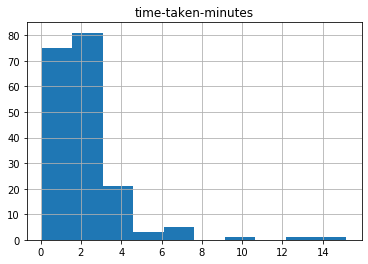

In [3]:
df.hist('time-taken-minutes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125e801d0>]],
      dtype=object)

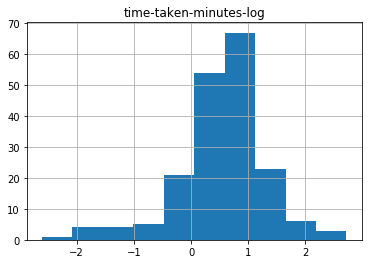

In [145]:
df['time-taken-minutes-log'] =  np.log(df['time-taken-minutes']) #df['time-taken-minutes']**(1/2) #df['time-taken-minutes']**(1/3)
df.hist('time-taken-minutes-log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d55a8d0>]],
      dtype=object)

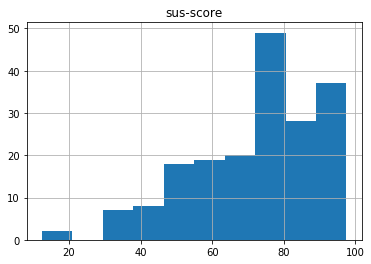

In [5]:
df.hist('sus-score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124895950>]],
      dtype=object)

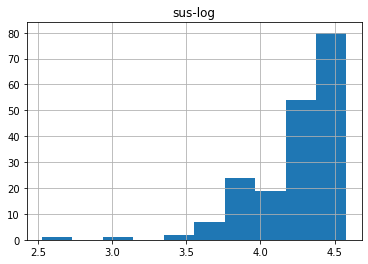

In [158]:
# susdf = df.loc[df['sus-score'] > 20]
# max_sus_score = susdf['sus-score'].max()
# min_sus_score = susdf['sus-score'].min()

df['sus-log'] = np.log(df['sus-score'])
df.hist('sus-log')
# susdf['sus-score']**(1/2) #(susdf['sus-score'] - susdf['sus-score'].mean())/susdf['sus-score'].std(ddof=0)
# susdf['sus-z'] = (susdf['sus-score'] - min_sus_score) / (max_sus_score - min_sus_score)
# susdf.hist('sus-z')

# # # susdf['sus-score-log'] =   susdf['sus-score']**(1/3) #np.log(susdf['sus-score'])


In [7]:
# max_sus_score = susdf['sus-score'].max()
# min_sus_score = susdf['sus-score'].min()

# susdf['sus-score-fish'] = ((susdf['sus-score'] - susdf['sus-score'].min() / susdf['sus-score'].max() - susdf['sus-score'].min()) - 5) * 2
# susdf.hist('sus-score-fish')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12620e9d0>]],
      dtype=object)

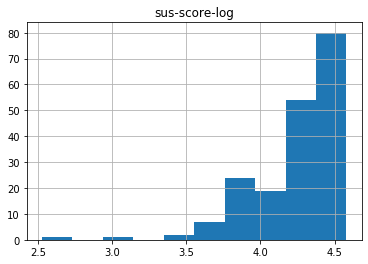

In [148]:
# def normalize(column):
#     upper = column.max()
#     lower = column.min()
#     y = (column - lower)/(upper-lower)
#     return y

# def sigmoid(x):
#     e = np.exp(1)
#     y = 1/(1+e**(-x))
#     return y

# df['sus-score-log'] = normalize(np.log(df['sus-score']+ 1))
# df['sus-score-log'] = sigmoid(df['sus-score'])
# df['sus-score-log'] = normalize( df['sus-score']**(1/3))
# log_max = np.log(df['sus-score'].max())
# df['sus-score-log'] =  df['sus-score']**(1/log_max)
# df['sus-score-log'] =  normalize(df['sus-score']**(1/log_max))
# df['sus-score-log'] = np.tanh(df['sus-score'])
# df['sus-score-log'] = np.log(df['sus-score'])
df['sus-score-log'] = np.log(df['sus-score'])


df.hist('sus-score-log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d8a4d10>]],
      dtype=object)

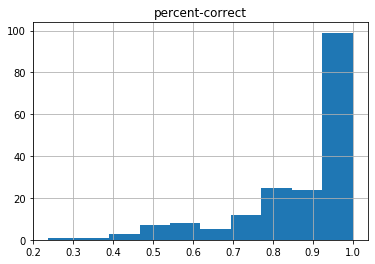

In [9]:
perdf = df.loc[df['percent-correct'] > .2]
perdf.hist('percent-correct')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126002e50>]],
      dtype=object)

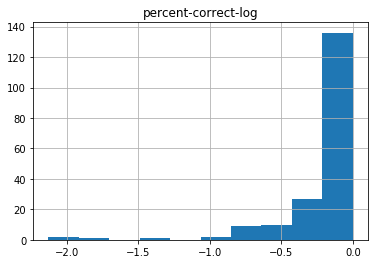

In [152]:
# from scipy.stats import boxcox

# perdf['percent-correct-log'] = boxcox
# perdf['percent-correct-log'] = np.sqrt((perdf['percent-correct']))

# # boxcox(perdf['percent-correct'], lmbda=-1)

# # np.log(perdf['percent-correct']) #perdf['percent-correct']**1/2 #normalize(np.log(df['percent-correct']+ 1))
# perdf.hist('percent-correct-log')
df['percent-correct-log'] = np.log(df['percent-correct'])

df.hist('percent-correct-log') 

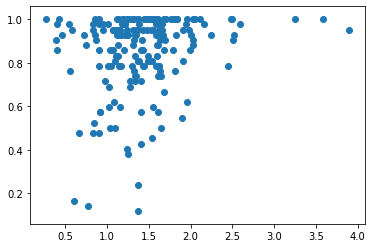

In [11]:
plt.scatter(df['time-taken-minutes-log'], df['percent-correct'])

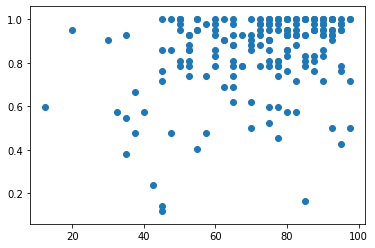

In [12]:
plt.scatter(df['sus-score'], df['percent-correct'])

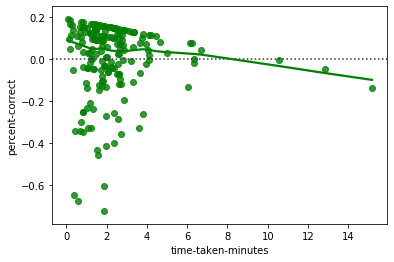

In [13]:
sns.residplot(df['time-taken-minutes'], df['percent-correct'], lowess=True, color="g")


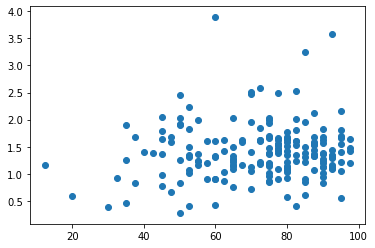

In [14]:
plt.scatter(df['sus-score'], df['time-taken-minutes-log'])

In [15]:
# Create linear regression object
X = df[['time-taken-minutes-log']]
Y = df[['percent-correct']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent-correct   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     7.387
Date:                Tue, 25 Feb 2020   Prob (F-statistic):            0.00719
Time:                        22:22:04   Log-Likelihood:                 59.303
No. Observations:                 188   AIC:                            -114.6
Df Residuals:                     186   BIC:                            -108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7537      0.038     19.916      0.000       0.679       0.828
time-taken-minutes-log     0.0687      0.025      2.718      0.007       0.019       0.119
==============================================================================
Omnibus:                       68.375   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.820
Skew:                          -1.672   Prob(JB):                     1.46e-34
Kurtosis:                       5.952   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = df[['time-taken-minutes-log']]
Y = df[['sus-score']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sus-score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.471
Date:                Tue, 25 Feb 2020   Prob (F-statistic):              0.118
Time:                        22:22:04   Log-Likelihood:                -802.75
No. Observations:                 188   AIC:                             1609.
Df Residuals:                     186   BIC:                             1616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     66.7273      3.710     17.986      0.000      59.408      74.046
time-taken-minutes-log     3.8970      2.479      1.572      0.118      -0.994       8.788
==============================================================================
Omnibus:                       13.589   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.167
Skew:                          -0.694   Prob(JB):                     0.000509
Kurtosis:                       2.900   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = df[['time-taken-minutes-log']]
Y = df[['percent-correct']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent-correct   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     7.387
Date:                Tue, 25 Feb 2020   Prob (F-statistic):            0.00719
Time:                        22:22:04   Log-Likelihood:                 59.303
No. Observations:                 188   AIC:                            -114.6
Df Residuals:                     186   BIC:                            -108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7537      0.038     19.916      0.000       0.679       0.828
time-taken-minutes-log     0.0687      0.025      2.718      0.007       0.019       0.119
==============================================================================
Omnibus:                       68.375   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.820
Skew:                          -1.672   Prob(JB):                     1.46e-34
Kurtosis:                       5.952   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

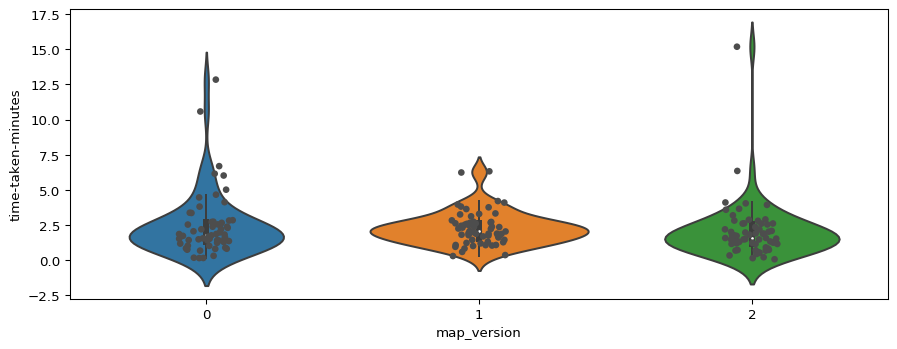

In [18]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map_version',y='time-taken-minutes', data=df)
sns.stripplot(x='map_version',y='time-taken-minutes', color=".3", data=df)

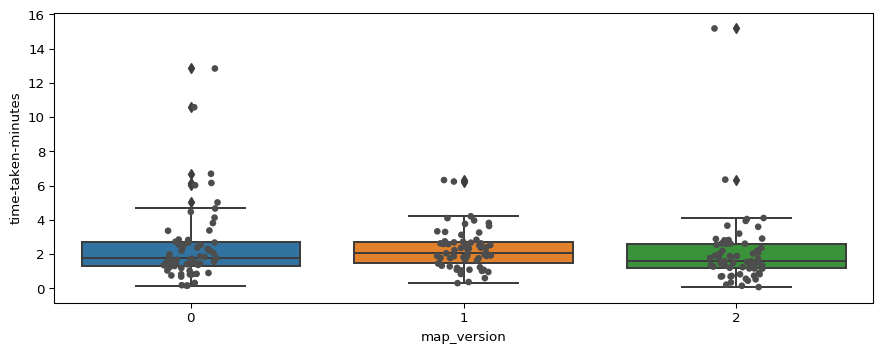

In [19]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map_version',y='time-taken-minutes', data=df)
sns.stripplot(x='map_version',y='time-taken-minutes', color=".3", data=df)

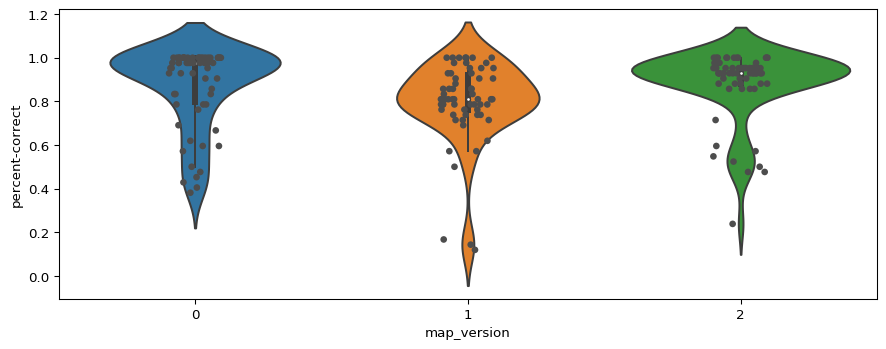

In [20]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map_version',y='percent-correct', data=df)
sns.stripplot(x='map_version',y='percent-correct', color=".3", data=df)

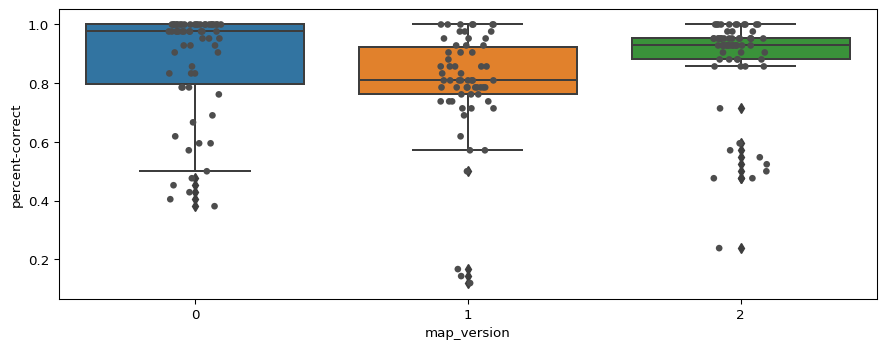

In [21]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map_version',y='percent-correct', data=df)
sns.stripplot(x='map_version',y='percent-correct', color=".3", data=df)

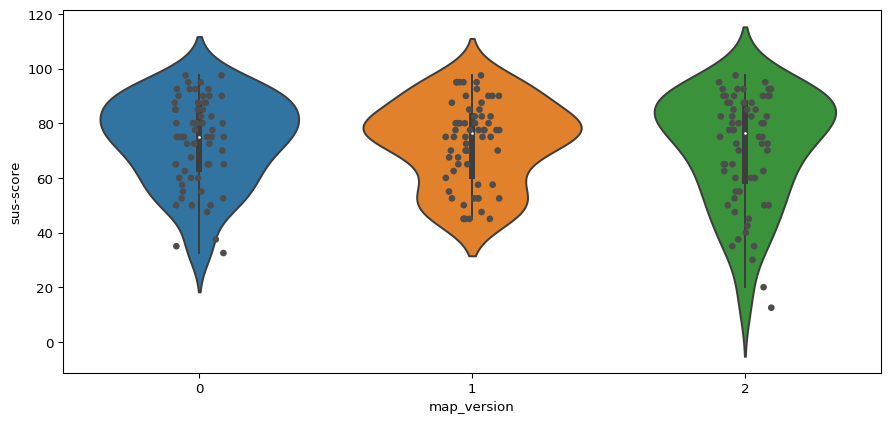

In [22]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='map_version',y='sus-score', data=df)
sns.stripplot(x='map_version',y='sus-score', color=".3", data=df)

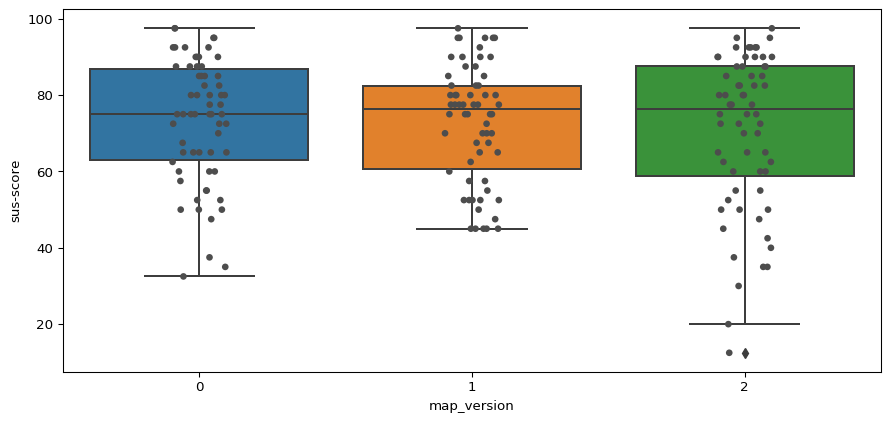

In [23]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='map_version',y='sus-score', data=df)
sns.stripplot(x='map_version',y='sus-score', color=".3", data=df)

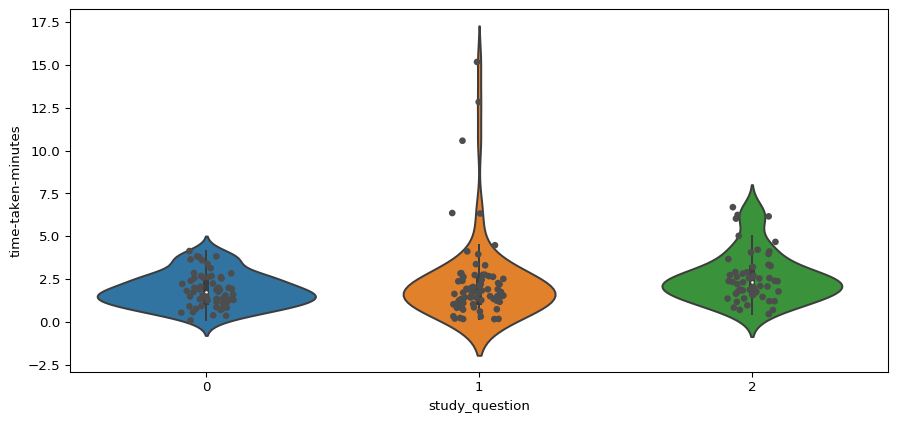

In [24]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study_question',y='time-taken-minutes', data=df)
sns.stripplot(x='study_question',y='time-taken-minutes', color=".3", data=df)

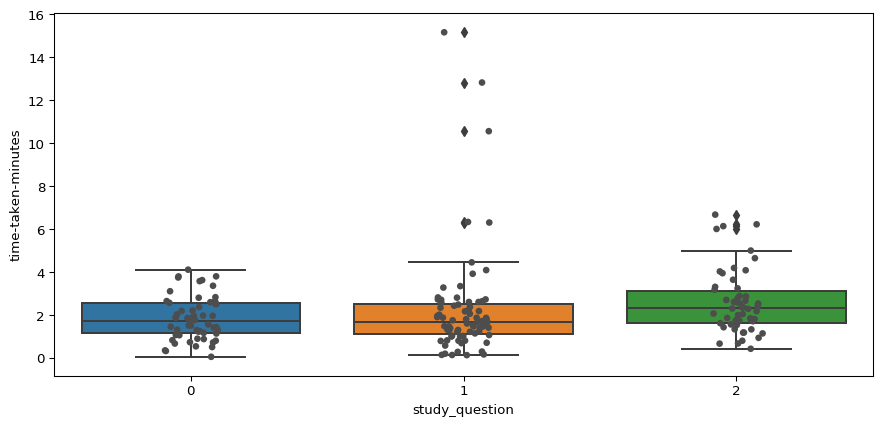

In [25]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study_question',y='time-taken-minutes', data=df)
sns.stripplot(x='study_question',y='time-taken-minutes', color=".3", data=df)

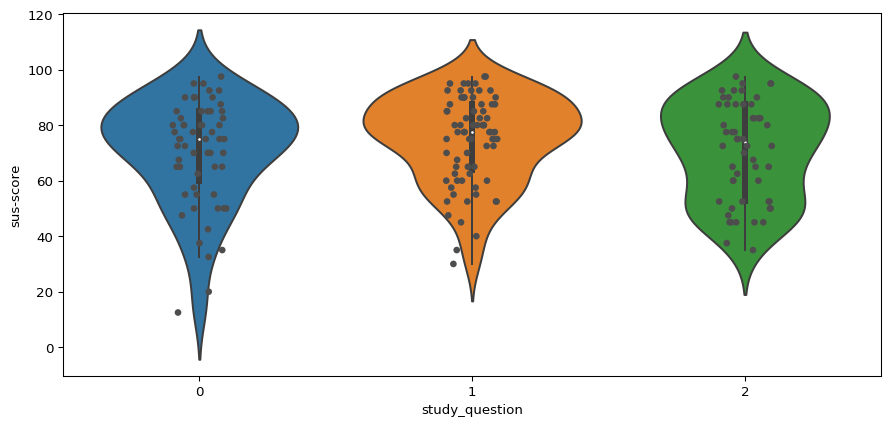

In [26]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study_question',y='sus-score', data=df)
sns.stripplot(x='study_question',y='sus-score', color=".3", data=df)


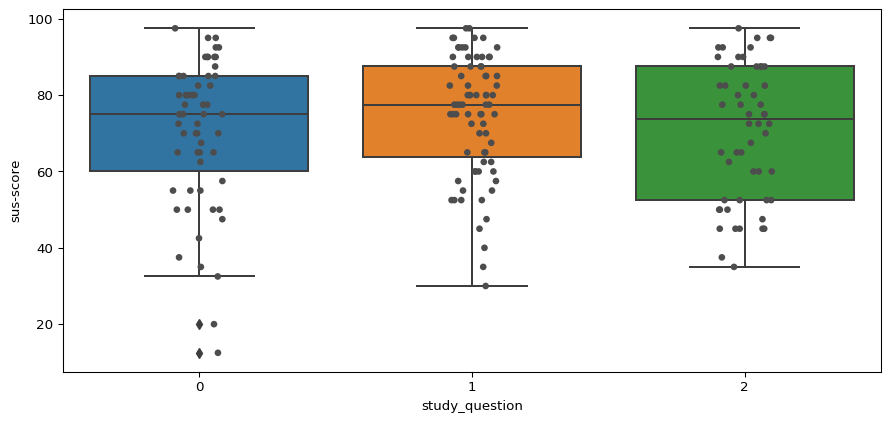

In [27]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study_question',y='sus-score', data=df)
sns.stripplot(x='study_question',y='sus-score', color=".3", data=df)


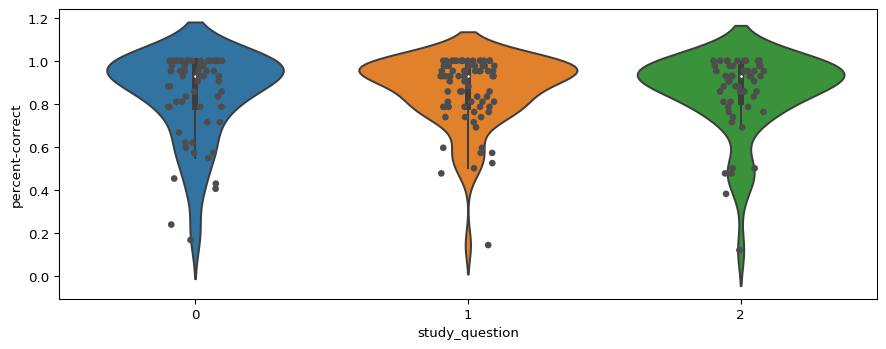

In [28]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='study_question',y='percent-correct', data=df)
sns.stripplot(x='study_question',y='percent-correct', color=".3", data=df)

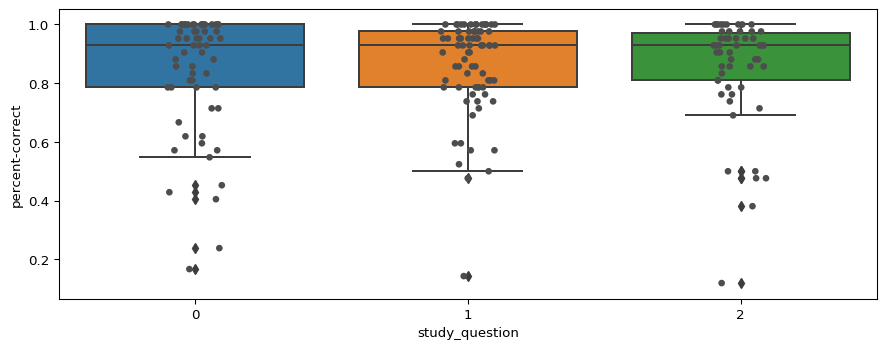

In [29]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study_question',y='percent-correct', data=df)
sns.stripplot(x='study_question',y='percent-correct', color=".3", data=df)

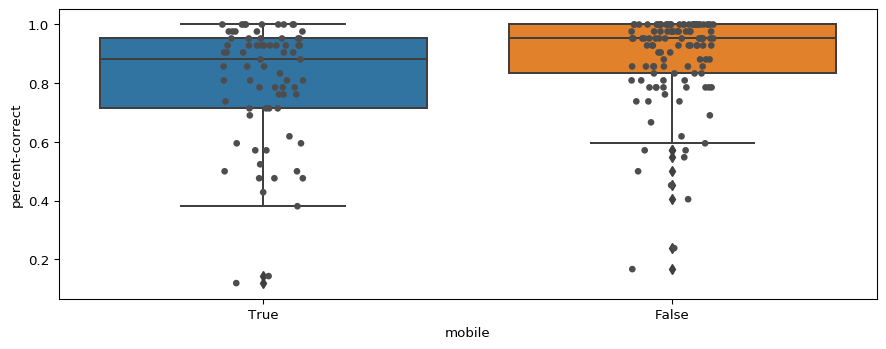

In [117]:
plt.figure(figsize=(11,4), dpi=96)
d['test'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False') 
df['mobile'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False')

# df['availWidth'] < 450

# df['test'] = df['availWidth'].astype(int)
sns.boxplot(x='mobile',y='percent-correct', data=df)
sns.stripplot(x='mobile',y='percent-correct', color=".3", data=df)
# plt.scatter(df['availWidth'], df['time-taken-minutes'])
# df.hist('test')

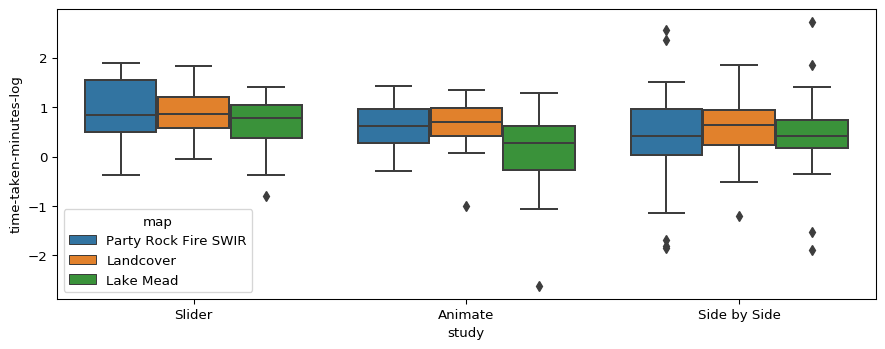

In [162]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='time-taken-minutes-log', hue='map', data=df)


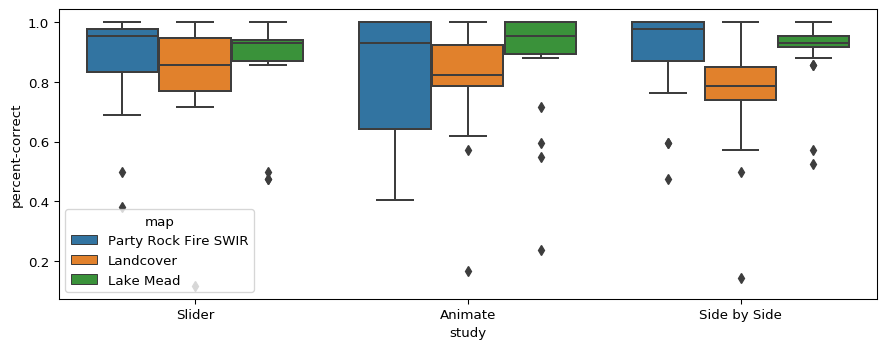

In [160]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='percent-correct', hue='map', data=df)

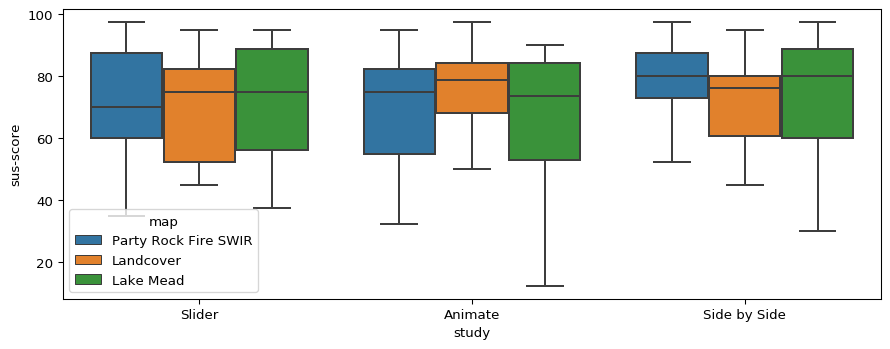

In [159]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='sus-score', hue='map', data=df)

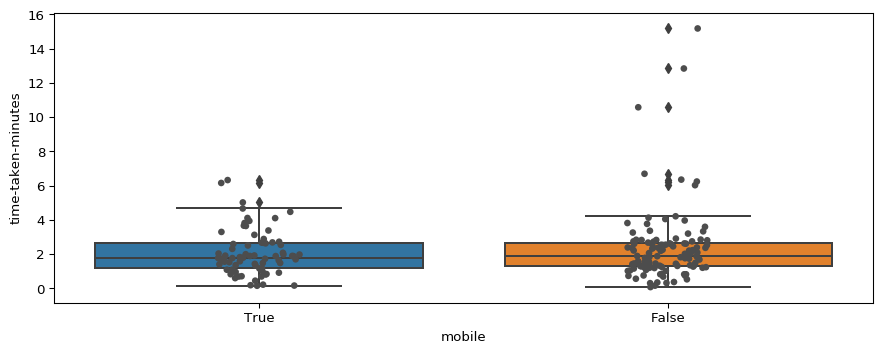

In [143]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='mobile',y='time-taken-minutes', data=df)
sns.stripplot(x='mobile',y='time-taken-minutes', color=".3", data=df)

In [111]:
import researchpy as rp
import scipy.stats as stats
import scikit_posthocs as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [122]:
df['study'] = df['study_question'].replace({0: 'Animate', 1: 'Side by Side', 2: 'Slider'})
df['map'] = df['map_version'].replace({0: 'Party Rock Fire SWIR', 1: 'Landcover', 2: 'Lake Mead'})

statdf = df.loc[:, ('study', 'mobile', 'map','time-taken-minutes', 'percent-correct','sus-score')]
statdf = df[['study', 'map','mobile', 'sus-score', 'time-taken-minutes', 'percent-correct']]
statdf = statdf.rename(columns={'time-taken-minutes': 'time', 'sus-score': 'sus', 'percent-correct': 'correct'})
statdf

,study,map,mobile,sus,time,correct
122,Slider,Party Rock Fire SWIR,True,70.0,6.152400,1.000000
172,Animate,Landcover,True,70.0,3.817233,0.619048
93,Slider,Landcover,True,72.5,2.626517,0.785714
141,Animate,Lake Mead,True,12.5,1.335950,0.595238
59,Side by Side,Landcover,True,57.5,2.590767,0.738095
...,...,...,...,...,...,...
134,Slider,Landcover,True,75.0,4.099900,0.904762
41,Slider,Lake Mead,True,65.0,1.580133,0.928571
179,Side by Side,Lake Mead,False,97.5,2.188917,1.000000
136,Side by Side,Party Rock Fire SWIR,False,65.0,1.490683,0.976190


In [62]:
statdf['both'] = df[['study', 'map']].agg('-'.join, axis=1) 
rp.summary_cont(statdf['time'].groupby(statdf['both']))

,N,Mean,SD,SE,95% Conf.,Interval
both,,,,,,
Animate-Lake Mead,22,1.444369,0.885737,0.188840,1.065533,1.823205
Animate-Landcover,18,2.182416,0.973804,0.229528,1.719498,2.645333
Animate-Party Rock Fire SWIR,19,2.032070,0.996049,0.228509,1.571919,2.492221
Side by Side-Lake Mead,23,2.422590,3.100604,0.646521,1.126930,3.718250
Side by Side-Landcover,26,2.041264,1.161617,0.227812,1.585910,2.496618
Side by Side-Party Rock Fire SWIR,26,2.397833,2.941491,0.576874,1.244769,3.550898
Slider-Lake Mead,19,2.185208,0.969197,0.222349,1.737462,2.632954
Slider-Landcover,18,2.680406,1.319093,0.310913,2.053349,3.307462
Slider-Party Rock Fire SWIR,17,2.967756,1.949037,0.472711,2.012728,3.922784


In [63]:
rp.summary_cont(statdf['correct'].groupby(statdf['both']))

,N,Mean,SD,SE,95% Conf.,Interval
both,,,,,,
Animate-Lake Mead,22,0.882035,0.192377,0.041015,0.799754,0.964316
Animate-Landcover,18,0.798942,0.198739,0.046843,0.704467,0.893416
Animate-Party Rock Fire SWIR,19,0.818296,0.221400,0.050793,0.716014,0.920577
Side by Side-Lake Mead,23,0.900621,0.116786,0.024352,0.851819,0.949423
Side by Side-Landcover,26,0.777473,0.174437,0.034210,0.709093,0.845852
Side by Side-Party Rock Fire SWIR,26,0.909341,0.148770,0.029176,0.851023,0.967658
Slider-Lake Mead,19,0.857143,0.171326,0.039305,0.777994,0.936291
Slider-Landcover,18,0.824074,0.199228,0.046958,0.729367,0.918781
Slider-Party Rock Fire SWIR,17,0.872549,0.184416,0.044728,0.782185,0.962913


In [64]:
rp.summary_cont(statdf['sus'].groupby(statdf['both']))

,N,Mean,SD,SE,95% Conf.,Interval
both,,,,,,
Animate-Lake Mead,22,66.931818,22.742500,4.848717,57.204690,76.658946
Animate-Landcover,18,76.111111,13.699029,3.228892,69.599006,82.623216
Animate-Party Rock Fire SWIR,19,68.947368,18.358237,4.211668,60.466296,77.428441
Side by Side-Lake Mead,23,73.260870,19.806375,4.129915,64.984312,81.537427
Side by Side-Landcover,26,72.596154,15.057901,2.953097,66.693457,78.498851
Side by Side-Party Rock Fire SWIR,26,78.365385,12.102527,2.373501,73.621194,83.109575
Slider-Lake Mead,19,71.578947,18.675045,4.284349,62.951517,80.206378
Slider-Landcover,18,69.583333,17.578605,4.143317,61.226995,77.939672
Slider-Party Rock Fire SWIR,17,70.588235,17.952398,4.354096,61.791560,79.384910


In [65]:
rp.summary_cont(statdf['time'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,59,1.858795,0.988627,0.128708,1.604362,2.113229
Side by Side,75,2.281815,2.503662,0.289098,1.711367,2.852262
Slider,54,2.596631,1.459853,0.198661,2.203600,2.989663


In [42]:
rp.summary_cont(statdf['correct'].groupby(statdf['map']))

,N,Mean,SD,SE,95% Conf.,Interval
map,,,,,,
Lake Mead,64,0.881324,0.160618,0.020077,0.841662,0.920987
Landcover,62,0.797235,0.186868,0.023732,0.750340,0.844130
Party Rock Fire SWIR,62,0.871352,0.184249,0.023400,0.825114,0.917590


In [43]:
rp.summary_cont(statdf['sus'].groupby(statdf['map']))

,N,Mean,SD,SE,95% Conf.,Interval
map,,,,,,
Lake Mead,64,70.585938,20.411161,2.551395,65.545671,75.626204
Landcover,62,72.741935,15.415753,1.957803,68.873317,76.610554
Party Rock Fire SWIR,62,73.346774,16.214138,2.059198,69.277799,77.415749


In [41]:
# time taken statistics
rp.summary_cont(statdf['time'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,59,1.858795,0.988627,0.128708,1.604362,2.113229
Side by Side,75,2.281815,2.503662,0.289098,1.711367,2.852262
Slider,54,2.596631,1.459853,0.198661,2.203600,2.989663


In [33]:
# Accuracy statistics
rp.summary_cont(statdf['correct'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,59,0.836158,0.203769,0.026528,0.783716,0.888600
Side by Side,75,0.860952,0.159913,0.018465,0.824517,0.897388
Slider,54,0.850970,0.182690,0.024861,0.801785,0.900155


In [34]:
# SUS Score taken statistics
rp.summary_cont(statdf['sus'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,59,70.381356,19.032717,2.477849,65.483084,75.279627
Side by Side,75,74.800000,15.799418,1.824360,71.200176,78.399824
Slider,54,70.601852,17.763748,2.417340,65.819376,75.384327


In [35]:
# an_time = statdf['correct'][statdf['study'] == 'Animate']
# ss_time = statdf['correct'][statdf['study'] == 'Side by Side']
# sl_time = statdf['correct'][statdf['study'] == 'Slider']
# # an_time = statdf['correct'][statdf['map'] == 'Party Rock Fire SWIR']
# # ss_time = statdf['correct'][statdf['map'] == 'Landcover']
# # sl_time = statdf['correct'][statdf['map'] == 'Lake Mead']
# stat, p = stats.kruskal(ss_time, sl_time)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably the same distribution')
# else:
# 	print('Probably different distributions')


In [36]:
print('Study and Time')

# Time taken statistics
stats_table = rp.summary_cont(statdf['time'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('time ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'time'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='time', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider']) 
print(levene)

Study and Time


Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       59  1.858795  0.988627  0.128708   1.604362  2.113229
Side by Side  75  2.281815  2.503662  0.289098   1.711367  2.852262
Slider        54  2.596631  1.459853  0.198661   2.203600  2.989663

oneway Table
F_onewayResult(statistic=2.2738676479906546, pvalue=0.10578263701791661)

ANOVA Table
              sum_sq     df         F    PR(>F)
C(study)   15.572826    2.0  2.273868  0.105783
Residual  633.496155  185.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side    0.423 0.3908 -0.3379 1.1839  False
     Animate       Slider   0.7378 0.0891 -0.0856 1.5613  False
Side by Side       Slider   0.3148 0.5993 -0.4655 1.09

In [37]:
print('Study and Correctness')

# Correctness taken statistics
stats_table = rp.summary_cont(statdf['correct'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('correct ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'correct'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='correct', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider']) 
print(levene)

Study and Correctness


Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       59  0.836158  0.203769  0.026528   0.783716  0.888600
Side by Side  75  0.860952  0.159913  0.018465   0.824517  0.897388
Slider        54  0.850970  0.182690  0.024861   0.801785  0.900155

oneway Table
F_onewayResult(statistic=0.3098950719165962, pvalue=0.7339039475648158)

ANOVA Table
            sum_sq     df         F    PR(>F)
C(study)  0.020334    2.0  0.309895  0.733904
Residual  6.069512  185.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side   0.0248 0.6946 -0.0497 0.0993  False
     Animate       Slider   0.0148 0.8961 -0.0658 0.0954  False
Side by Side       Slider    -0.01    0.9 -0.0864 0.06

In [38]:
print('Study and SUS Score')

# sus score taken statistics
stats_table = rp.summary_cont(statdf['sus'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')
# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')
# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'sus'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='sus', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider']) 
print(levene)

Study and SUS Score


Stats Table
               N       Mean         SD        SE  95% Conf.   Interval
study                                                                 
Animate       59  70.381356  19.032717  2.477849  65.483084  75.279627
Side by Side  75  74.800000  15.799418  1.824360  71.200176  78.399824
Slider        54  70.601852  17.763748  2.417340  65.819376  75.384327

oneway Table
F_onewayResult(statistic=1.3824885788868466, pvalue=0.25353353843222176)

ANOVA Table
                sum_sq     df         F    PR(>F)
C(study)    840.050268    2.0  1.382489  0.253534
Residual  56206.359306  185.0       NaN       NaN

Tukey adhoc
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
     Animate Side by Side   4.4186 0.3148  -2.7485 11.5858  False
     Animate       Slider   0.2205    0.9   -7.536   7.977  False
Side by Side      

In [39]:
# import formula api as alias smf #smfimport statsmodels.formula.api as smf

# est = ols(formula='study_question ~ time + sus + correct', data=statdf).fit()
# est.summary()
# print( C(statdf['study_question']) )
# est = ols(formula='time ~ C(study_question)', data=statdf).fit()
# est.summary()

# X = statdf[['sus', 'time']] 
# y = statdf['study']
# ## fit a OLS model with intercept on TV and Radio
# X = sm.add_constant(X)
# est = sm.OLS(y, X).fit()
# est.summary()

# model = ols('C(sus, Sum) + C(time, Sum) ~ C(study)', statdf).fit()
# model.summary()
# # model = ols('sus ~ C(study)*C(map)', statdf).fit()
# # # print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
# # m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf[['study','map']], alpha=0.05)
# # print('Tukey adhoc')
# # print(m_comp)
# # print('')

In [66]:
data = [statdf.loc[ids, 'time'].values for ids in statdf.groupby('both').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='time', group_col='both', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

kruskal pvalue
0.029406218047393635

kruskal posthoc
                                   Animate-Lake Mead  Animate-Landcover  \
Animate-Lake Mead                          -1.000000           0.635561   
Animate-Landcover                           0.635561          -1.000000   
Animate-Party Rock Fire SWIR                1.000000           1.000000   
Side by Side-Lake Mead                      1.000000           1.000000   
Side by Side-Landcover                      1.000000           1.000000   
Side by Side-Party Rock Fire SWIR           1.000000           1.000000   
Slider-Lake Mead                            0.476673           1.000000   
Slider-Landcover                            0.041797           1.000000   
Slider-Party Rock Fire SWIR                 0.107055           1.000000   

                                   Animate-Party Rock Fire SWIR  \
Animate-Lake Mead                                           1.0   
Animate-Landcover                                           1.

In [68]:
data = [statdf.loc[ids, 'sus'].values for ids in statdf.groupby('both').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='sus', group_col='both', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

kruskal pvalue
0.6708899738694309

kruskal posthoc
                                   Animate-Lake Mead  Animate-Landcover  \
Animate-Lake Mead                               -1.0                1.0   
Animate-Landcover                                1.0               -1.0   
Animate-Party Rock Fire SWIR                     1.0                1.0   
Side by Side-Lake Mead                           1.0                1.0   
Side by Side-Landcover                           1.0                1.0   
Side by Side-Party Rock Fire SWIR                1.0                1.0   
Slider-Lake Mead                                 1.0                1.0   
Slider-Landcover                                 1.0                1.0   
Slider-Party Rock Fire SWIR                      1.0                1.0   

                                   Animate-Party Rock Fire SWIR  \
Animate-Lake Mead                                           1.0   
Animate-Landcover                                           1.0 

In [69]:
data = [statdf.loc[ids, 'correct'].values for ids in statdf.groupby('both').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='correct', group_col='both', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

kruskal pvalue
0.0023166071215935577

kruskal posthoc
                                   Animate-Lake Mead  Animate-Landcover  \
Animate-Lake Mead                          -1.000000           0.641908   
Animate-Landcover                           0.641908          -1.000000   
Animate-Party Rock Fire SWIR                1.000000           1.000000   
Side by Side-Lake Mead                      1.000000           1.000000   
Side by Side-Landcover                      0.032189           1.000000   
Side by Side-Party Rock Fire SWIR           1.000000           0.078818   
Slider-Lake Mead                            1.000000           1.000000   
Slider-Landcover                            1.000000           1.000000   
Slider-Party Rock Fire SWIR                 1.000000           1.000000   

                                   Animate-Party Rock Fire SWIR  \
Animate-Lake Mead                                      1.000000   
Animate-Landcover                                      1.0000

In [85]:
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')


Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side   0.0248 0.6946 -0.0497 0.0993  False
     Animate       Slider   0.0148 0.8961 -0.0658 0.0954  False
Side by Side       Slider    -0.01    0.9 -0.0864 0.0664  False
---------------------------------------------------------------

